# Time Series Analysis for NIFTY 50

In [1]:
import numpy as np
import pandas_datareader
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import pylab
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

##Gather Data For Time Series

In [2]:
# Gathering Data for Analysis 
# Source Yahoo Finance

Ex = ['^NSEI','S68.SI', '^GDAXI', '^N225']

Indices = [Ex[0], Ex[1], Ex[2], Ex[3]]

Ind_data = pd.DataFrame()

for I in Indices:
    Ind_data[I] = wb.DataReader(I, data_source='yahoo', start='2017-4-1')['Adj Close']
    
# Calculating Index Returns
Ind_ret = np.log(Ind_data / Ind_data.shift(1))
Ind_ret.describe()

,^NSEI,S68.SI,^GDAXI,^N225
count,1029.000000,985.000000,984.000000,923.000000
mean,0.000522,0.000339,0.000223,0.000351
std,0.012320,0.012324,0.013101,0.011910
min,-0.139038,-0.123481,-0.130549,-0.062736
25%,-0.004587,-0.004796,-0.004596,-0.004923
50%,0.001021,0.000000,0.000550,0.000558
75%,0.006528,0.005510,0.006049,0.005695
max,0.084003,0.072955,0.104143,0.077314


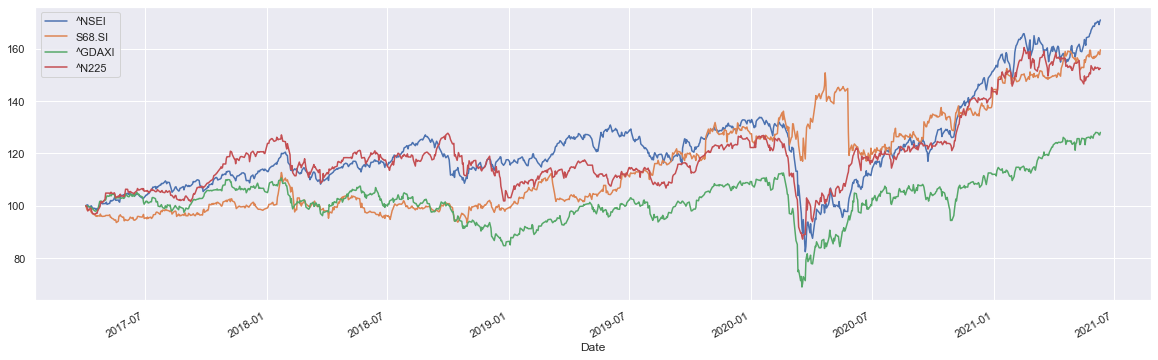

In [3]:
# Cleaning NA

Ind_data.isna().sum()
Ind_data = Ind_data.fillna(method = 'bfill')

# Ploting Ledgend

(Ind_data / Ind_data.iloc[0] * 100).plot(figsize=(20, 6));
plt.show()

In [4]:
Ind_data.tail()

,^NSEI,S68.SI,^GDAXI,^N225
Date,,,,
2021-06-07,15751.650391,10.44,15677.150391,29019.240234
2021-06-08,15740.099609,10.50,15640.599609,28963.560547
2021-06-09,15635.349609,10.47,15581.139648,28860.800781
2021-06-10,15737.750000,10.43,15571.219727,28958.560547
2021-06-11,15799.349609,10.55,15693.269531,28948.730469


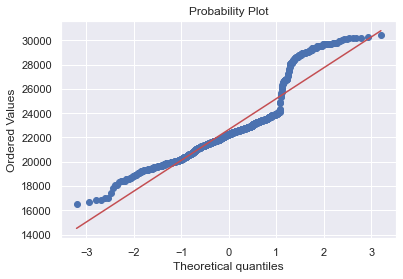

In [5]:
scipy.stats.probplot(Ind_data[I], plot = pylab)
pylab.show()

In [6]:
# Setting TimeSeries Frequency 
Ind_data.index = pd.DatetimeIndex(Ind_data.index)
Ind_data = Ind_data.asfreq('b')
Ind_data.isna().sum()
Ind_data = Ind_data.fillna(method = 'bfill')

Date
2017-04-03    12257.200195
2017-04-04    12217.540039
2017-04-05    12217.540039
2017-04-06    12230.889648
2017-04-07    12225.059570
                  ...     
2021-06-07    15677.150391
2021-06-08    15640.599609
2021-06-09    15581.139648
2021-06-10    15571.219727
2021-06-11    15693.269531
Freq: B, Name: ^GDAXI, Length: 1095, dtype: float64

In [9]:
sts.adfuller(Ind_data["^NSEI"])

(-0.5166668499540148,
 0.8887228312160192,
 11,
 1083,
 {'1%': -3.436402509014354,
  '5%': -2.8642124318084456,
  '10%': -2.568192893555997},
 13406.520133705839)

In [10]:
# Splitting Traning & Tesing Set
size = int(len(Ind_data)*0.75)
Indx_train = Ind_data.iloc[:size]
Indx_test = Ind_data.iloc[size:]

# LLR Test
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.llf
    L2 = mod_2.llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [11]:
model_arima_111 = ARIMA(Indx_train["^NSEI"], order=(1,1,1))
results_arima_111 = model_arima_111.fit()
model_arima_112 = ARIMA(Indx_train["^NSEI"], order=(1,1,2))
results_arima_112 = model_arima_112.fit()
model_arima_113 = ARIMA(Indx_train["^NSEI"], order=(1,1,3))
results_arima_113 = model_arima_113.fit()
model_arima_114 = ARIMA(Indx_train["^NSEI"], order=(1,1,4))
results_arima_114 = model_arima_114.fit()
model_arima_115 = ARIMA(Indx_train["^NSEI"], order=(1,1,5))
results_arima_115 = model_arima_115.fit()
model_arima_116 = ARIMA(Indx_train["^NSEI"], order=(1,1,6))
results_arima_116 = model_arima_116.fit()

model_arima_211 = ARIMA(Indx_train["^NSEI"], order=(2,1,1))
results_arima_211 = model_arima_211.fit()
model_arima_212 = ARIMA(Indx_train["^NSEI"], order=(2,1,2))
results_arima_212 = model_arima_212.fit()
model_arima_213 = ARIMA(Indx_train["^NSEI"], order=(2,1,3))
results_arima_213 = model_arima_213.fit()
model_arima_214 = ARIMA(Indx_train["^NSEI"], order=(2,1,4))
results_arima_214 = model_arima_214.fit()
model_arima_215 = ARIMA(Indx_train["^NSEI"], order=(2,1,5))
results_arima_215 = model_arima_215.fit()
model_arima_216 = ARIMA(Indx_train["^NSEI"], order=(2,1,6))
results_arima_216 = model_arima_216.fit()

model_arima_311 = ARIMA(Indx_train["^NSEI"], order=(3,1,1))
results_arima_311 = model_arima_311.fit()
model_arima_312 = ARIMA(Indx_train["^NSEI"], order=(3,1,2))
results_arima_312 = model_arima_312.fit()
model_arima_313 = ARIMA(Indx_train["^NSEI"], order=(3,1,3))
results_arima_313 = model_arima_313.fit()
model_arima_314 = ARIMA(Indx_train["^NSEI"], order=(3,1,4))
results_arima_314 = model_arima_314.fit()
model_arima_315 = ARIMA(Indx_train["^NSEI"], order=(3,1,5))
results_arima_315 = model_arima_315.fit()
model_arima_316 = ARIMA(Indx_train["^NSEI"], order=(3,1,6))
results_arima_316 = model_arima_316.fit()

# Fitting ARIMA Model Lag (AR 1 to 3) & (MA 1 to 6)

In [12]:
print("ARIMA(1,1,1):  \t LL = ", results_arima_111.llf, "\t AIC = ", results_arima_111.aic)
print("ARIMA(1,1,2):* \t LL = ", results_arima_112.llf, "\t AIC = ", results_arima_112.aic)
print("ARIMA(1,1,3):  \t LL = ", results_arima_113.llf, "\t AIC = ", results_arima_113.aic)
print("ARIMA(1,1,4):  \t LL = ", results_arima_114.llf, "\t AIC = ", results_arima_114.aic)
print("ARIMA(1,1,5):  \t LL = ", results_arima_115.llf, "\t AIC = ", results_arima_115.aic)
print("ARIMA(1,1,6):  \t LL = ", results_arima_116.llf, "\t AIC = ", results_arima_116.aic)

print("ARIMA(2,1,1):* \t LL = ", results_arima_211.llf, "\t AIC = ", results_arima_211.aic)
print("ARIMA(2,1,2):* \t LL = ", results_arima_212.llf, "\t AIC = ", results_arima_212.aic)
print("ARIMA(2,1,3):  \t LL = ", results_arima_213.llf, "\t AIC = ", results_arima_213.aic)
print("ARIMA(2,1,4):  \t LL = ", results_arima_214.llf, "\t AIC = ", results_arima_214.aic)
print("ARIMA(2,1,5):  \t LL = ", results_arima_215.llf, "\t AIC = ", results_arima_215.aic)
print("ARIMA(2,1,6):  \t LL = ", results_arima_216.llf, "\t AIC = ", results_arima_216.aic)

print("ARIMA(3,1,1):  \t LL = ", results_arima_311.llf, "\t AIC = ", results_arima_311.aic)
print("ARIMA(3,1,2):  \t LL = ", results_arima_312.llf, "\t AIC = ", results_arima_312.aic)
print("ARIMA(3,1,3):* \t LL = ", results_arima_313.llf, "\t AIC = ", results_arima_313.aic)
print("ARIMA(3,1,4):* \t LL = ", results_arima_314.llf, "\t AIC = ", results_arima_314.aic)
print("ARIMA(3,1,5):  \t LL = ", results_arima_315.llf, "\t AIC = ", results_arima_315.aic)
print("ARIMA(3,1,6):  \t LL = ", results_arima_316.llf, "\t AIC = ", results_arima_316.aic)

ARIMA(1,1,1):  	 LL =  -5079.320812137033 	 AIC =  10166.641624274065
ARIMA(1,1,2):* 	 LL =  -5076.198587191313 	 AIC =  10162.397174382626
ARIMA(1,1,3):  	 LL =  -5076.094180425316 	 AIC =  10164.188360850632
ARIMA(1,1,4):  	 LL =  -5076.093834423698 	 AIC =  10166.187668847397
ARIMA(1,1,5):  	 LL =  -5064.438045097471 	 AIC =  10144.876090194943
ARIMA(1,1,6):  	 LL =  -5059.825903793224 	 AIC =  10137.651807586448
ARIMA(2,1,1):* 	 LL =  -5076.411405125175 	 AIC =  10162.82281025035
ARIMA(2,1,2):* 	 LL =  -5066.800653726539 	 AIC =  10145.601307453078
ARIMA(2,1,3):  	 LL =  -5071.307540904636 	 AIC =  10156.615081809272
ARIMA(2,1,4):  	 LL =  -5070.782354130674 	 AIC =  10157.564708261349
ARIMA(2,1,5):  	 LL =  -5060.877001080362 	 AIC =  10139.754002160724
ARIMA(2,1,6):  	 LL =  -5058.663077025996 	 AIC =  10137.326154051992
ARIMA(3,1,1):  	 LL =  -5076.114738282356 	 AIC =  10164.229476564711
ARIMA(3,1,2):  	 LL =  -5070.456958409126 	 AIC =  10154.913916818252
ARIMA(3,1,3):* 	 LL =

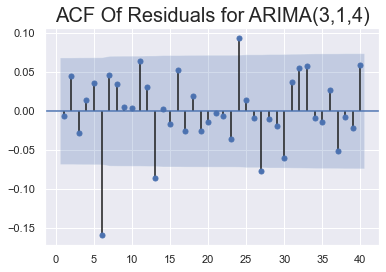

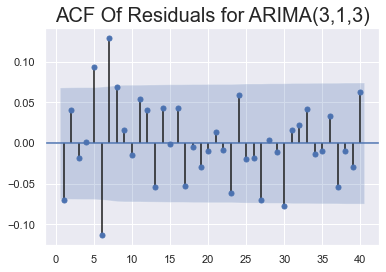


LLR test p-value = 0.001
Since MA 4th & 6th lag are signifinacantly different from Zero need to test for higher lags


In [19]:
Indx_train['res_arima_314'] = results_arima_314.resid.iloc[:]
sgt.plot_acf(Indx_train.res_arima_314[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(3,1,4)",size=20)
plt.show()
Indx_train['res_arima_313'] = results_arima_313.resid.iloc[:]
sgt.plot_acf(Indx_train.res_arima_313[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(3,1,3)",size=20)
plt.show()

print("\nLLR test p-value = " + str(LLR_test(results_arima_312, results_arima_313)))

pd.options.mode.chained_assignment = None
print("Since MA 4th & 6th lag are signifinacantly different from Zero need to test for higher lags")

# Fitting ARIMA Model Lag (AR 4 to 6) & (MA 1 to 7)

In [14]:
model_arima_411 = ARIMA(Indx_train["^NSEI"], order=(4,1,1))
results_arima_411 = model_arima_411.fit()
model_arima_412 = ARIMA(Indx_train["^NSEI"], order=(4,1,2))
results_arima_412 = model_arima_412.fit()
model_arima_413 = ARIMA(Indx_train["^NSEI"], order=(4,1,3))
results_arima_413 = model_arima_413.fit()
model_arima_414 = ARIMA(Indx_train["^NSEI"], order=(4,1,4))
results_arima_414 = model_arima_414.fit()
model_arima_415 = ARIMA(Indx_train["^NSEI"], order=(4,1,5))
results_arima_415 = model_arima_415.fit()
model_arima_416 = ARIMA(Indx_train["^NSEI"], order=(4,1,6))
results_arima_416 = model_arima_416.fit()
model_arima_417 = ARIMA(Indx_train["^NSEI"], order=(4,1,7))
results_arima_417 = model_arima_417.fit()

model_arima_511 = ARIMA(Indx_train["^NSEI"], order=(5,1,1))
results_arima_511 = model_arima_511.fit()
model_arima_512 = ARIMA(Indx_train["^NSEI"], order=(5,1,2))
results_arima_512 = model_arima_512.fit()
model_arima_513 = ARIMA(Indx_train["^NSEI"], order=(5,1,3))
results_arima_513 = model_arima_513.fit()
model_arima_514 = ARIMA(Indx_train["^NSEI"], order=(5,1,4))
results_arima_514 = model_arima_514.fit()
model_arima_515 = ARIMA(Indx_train["^NSEI"], order=(5,1,5))
results_arima_515 = model_arima_515.fit()
model_arima_516 = ARIMA(Indx_train["^NSEI"], order=(5,1,6))
results_arima_516 = model_arima_516.fit()
model_arima_517 = ARIMA(Indx_train["^NSEI"], order=(5,1,7))
results_arima_517 = model_arima_517.fit()

model_arima_611 = ARIMA(Indx_train["^NSEI"], order=(6,1,1))
results_arima_611 = model_arima_611.fit()
model_arima_612 = ARIMA(Indx_train["^NSEI"], order=(6,1,2))
results_arima_612 = model_arima_612.fit()
model_arima_613 = ARIMA(Indx_train["^NSEI"], order=(6,1,3))
results_arima_613 = model_arima_613.fit()
model_arima_614 = ARIMA(Indx_train["^NSEI"], order=(6,1,4))
results_arima_614 = model_arima_614.fit()
model_arima_615 = ARIMA(Indx_train["^NSEI"], order=(6,1,5))
results_arima_615 = model_arima_615.fit()
model_arima_616 = ARIMA(Indx_train["^NSEI"], order=(6,1,6))
results_arima_616 = model_arima_616.fit()
model_arima_617 = ARIMA(Indx_train["^NSEI"], order=(6,1,7))
results_arima_617 = model_arima_617.fit()

In [15]:
print("ARIMA(4,1,1):  \t LL = ", results_arima_411.llf, "\t AIC = ", results_arima_411.aic)
print("ARIMA(4,1,2):  \t LL = ", results_arima_412.llf, "\t AIC = ", results_arima_412.aic)
print("ARIMA(4,1,3):  \t LL = ", results_arima_413.llf, "\t AIC = ", results_arima_413.aic)
print("ARIMA(4,1,4):  \t LL = ", results_arima_414.llf, "\t AIC = ", results_arima_414.aic)
print("ARIMA(4,1,5):  \t LL = ", results_arima_415.llf, "\t AIC = ", results_arima_415.aic)
print("ARIMA(4,1,6):  \t LL = ", results_arima_416.llf, "\t AIC = ", results_arima_416.aic)
print("ARIMA(4,1,7):  \t LL = ", results_arima_417.llf, "\t AIC = ", results_arima_417.aic)

print("ARIMA(5,1,1):  \t LL = ", results_arima_511.llf, "\t AIC = ", results_arima_511.aic)
print("ARIMA(5,1,2):  \t LL = ", results_arima_512.llf, "\t AIC = ", results_arima_512.aic)
print("ARIMA(5,1,3):  \t LL = ", results_arima_513.llf, "\t AIC = ", results_arima_513.aic)
print("ARIMA(5,1,4):  \t LL = ", results_arima_514.llf, "\t AIC = ", results_arima_514.aic)
print("ARIMA(5,1,5):* \t LL = ", results_arima_515.llf, "\t AIC = ", results_arima_515.aic)
print("ARIMA(5,1,6):  \t LL = ", results_arima_516.llf, "\t AIC = ", results_arima_516.aic)
print("ARIMA(5,1,7):  \t LL = ", results_arima_517.llf, "\t AIC = ", results_arima_517.aic)

print("ARIMA(6,1,1):  \t LL = ", results_arima_611.llf, "\t AIC = ", results_arima_611.aic)
print("ARIMA(6,1,2):  \t LL = ", results_arima_612.llf, "\t AIC = ", results_arima_612.aic)
print("ARIMA(6,1,3):  \t LL = ", results_arima_612.llf, "\t AIC = ", results_arima_613.aic)
print("ARIMA(6,1,4):  \t LL = ", results_arima_614.llf, "\t AIC = ", results_arima_614.aic)
print("ARIMA(6,1,5):  \t LL = ", results_arima_615.llf, "\t AIC = ", results_arima_615.aic)
print("ARIMA(6,1,6):  \t LL = ", results_arima_616.llf, "\t AIC = ", results_arima_616.aic)
print("ARIMA(6,1,7):* \t LL = ", results_arima_617.llf, "\t AIC = ", results_arima_617.aic)

ARIMA(4,1,1):  	 LL =  -5076.106047950265 	 AIC =  10166.21209590053
ARIMA(4,1,2):  	 LL =  -5069.75526589973 	 AIC =  10155.51053179946
ARIMA(4,1,3):  	 LL =  -5064.676226169563 	 AIC =  10147.352452339126
ARIMA(4,1,4):  	 LL =  -5062.442322098917 	 AIC =  10144.884644197835
ARIMA(4,1,5):  	 LL =  -5057.123062569182 	 AIC =  10136.246125138365
ARIMA(4,1,6):  	 LL =  -5054.009612656271 	 AIC =  10132.019225312542
ARIMA(4,1,7):  	 LL =  -5053.085853107979 	 AIC =  10132.171706215959
ARIMA(5,1,1):  	 LL =  -5062.072540743242 	 AIC =  10140.145081486484
ARIMA(5,1,2):  	 LL =  -5061.420096351127 	 AIC =  10140.840192702253
ARIMA(5,1,3):  	 LL =  -5054.070151608908 	 AIC =  10128.140303217817
ARIMA(5,1,4):  	 LL =  -5053.659196735201 	 AIC =  10129.318393470401
ARIMA(5,1,5):* 	 LL =  -5052.25546149551 	 AIC =  10128.51092299102
ARIMA(5,1,6):  	 LL =  -5051.553542182546 	 AIC =  10129.107084365092
ARIMA(5,1,7):  	 LL =  -5050.693900761359 	 AIC =  10129.387801522718
ARIMA(6,1,1):  	 LL =  -5

In [16]:
results_arima_515.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.^NSEI   No. Observations:                  820
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -5052.255
Method:                       css-mle   S.D. of innovations            114.667
Date:                Sat, 12 Jun 2021   AIC                          10128.511
Time:                        17:48:25   BIC                          10185.023
Sample:                    04-04-2017   HQIC                         10150.195
                         - 05-25-2020                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2746      5.189     -0.053      0.958     -10.445       9.896
ar.L1.D.^NSEI    -0.9630      0.145     -6.620      0.000      -1.248      -0.678
ar.L2.D.^NSEI    -0.4383      0.152     -2.875      0.004      -0.737      -0.139
ar.L3.D.^NSEI     0.3423      0.154      2.216      0.027       0.040       0.645
ar.L4.D.^NSEI     0.7671      0.141      5.437      0.000       0.491       1.044
ar.L5.D.^NSEI     0.4481      0.117      3.824      0.000       0.218       0.678
ma.L1.D.^NSEI     0.9262      0.158      5.875      0.000       0.617       1.235
ma.L2.D.^NSEI     0.4304      0.165      2.609      0.009       0.107       0.754
ma.L3.D.^NSEI    -0.3076      0.165     -1.860      0.063      -0.632       0.016
ma.L4.D.^NSEI    -0.7052      0.154     -4.579      0.000      -1.007      -0.403
ma.L5.D.^NSEI    -0.2472      0.135     -1.834      0.067      -0.511       0.017
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1402           -0.0000j            1.1402           -0.0000
AR.2           -0.2501           -1.0560j            1.0852           -0.2870
AR.3           -0.2501           +1.0560j            1.0852            0.2870
AR.4           -1.1760           -0.5282j            1.2891           -0.4328
AR.5           -1.1760           +0.5282j            1.2891            0.4328
MA.1            1.2175           -0.0000j            1.2175           -0.0000
MA.2           -0.3170           -1.0305j            1.0782           -0.2975
MA.3           -0.3170           +1.0305j            1.0782            0.2975
MA.4           -1.4131           -0.0000j            1.4131           -0.5000
MA.5           -2.0226           -0.0000j            2.0226           -0.5000
-----------------------------------------------------------------------------
"""

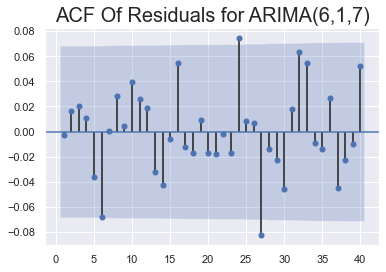

ARIMA(6,1,7):  	 LL =  -5050.304653295907 	 AIC =  10130.609306591814


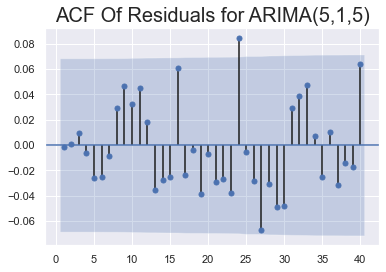

ARIMA(5,1,5):  	 LL =  -5052.25546149551 	 AIC =  10128.51092299102

LLR test p-value = 0.098


In [17]:
Indx_train['res_arima_617'] = results_arima_617.resid.iloc[:]
sgt.plot_acf(Indx_train.res_arima_617[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(6,1,7)",size=20)
plt.show()
print("ARIMA(6,1,7):  \t LL = ", results_arima_617.llf, "\t AIC = ", results_arima_617.aic)

Indx_train['res_arima_515'] = results_arima_515.resid.iloc[:]
sgt.plot_acf(Indx_train.res_arima_515[1:], zero = False, lags = 40)
plt.title("ACF Of Residuals for ARIMA(5,1,5)",size=20)
plt.show()
print("ARIMA(5,1,5):  \t LL = ", results_arima_515.llf, "\t AIC = ", results_arima_515.aic)
pd.options.mode.chained_assignment = None
print("\nLLR test p-value = " + str(LLR_test(results_arima_613, results_arima_614)))

In [ ]:
Indx_train["^NSEI"]

In [23]:
model_arima_515 = ARIMA(Indx_train["^NSEI"], exog = "S68.SI", order=(5,1,5))
results_arima_515 = model_arima_515.fit()

ValueError: exog is not 1d or 2d